# Turing Machine and Deep Learning

## Assignment 4 -- Neural Networks

This notebook is meant for you to review and reflect on the content of Lecture 4, which was mainly about neural networks. In particular, we'll focus on aspects that were only briefly mentioned in class in order for you to get a better understanding of it.

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a folder called "Week 4" and copy this notebook and any other files or data that may be needed.
2. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.

In [1]:
# load common libraries
import numpy as np                 # maths
import matplotlib.pyplot as plt    # plotting
import pandas as pd                # data manipulation
from tqdm import tqdm              # loading bar
from time import perf_counter      # timer
import tensorflow as tf            # NNs and associated
from tensorflow import keras       # NNs and associated

2024-03-25 16:24:58.916577: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Q1 CNNs

In the lecture, we saw some code that implemented MLPs and CNNs for the task of image classification on CIFAR10. However, we skipped over some details of what CNNs actually do.

A CNN works by automatically learning and extracting meaningful patterns, features, and hierarchies from the input data in the following way:

1. **Convolution**: A CNN applies (multiple) small filters (kernels) to an input image, performing element-wise multiplications and sums to extract features like edges, corners, and textures. We also did this computation in person during class. These kernels may be a matrix (what we saw in the lecture), or even a stack of matrices (e.g. for RGB images). I'd recommend watching this [3Blue1Brown video](https://www.youtube.com/watch?v=KuXjwB4LzSA&pp=ygUTY29udm9sdXRpb25zIGluIGNubg%3D%3D) and this [DeepLearning.AI](https://www.youtube.com/watch?v=KTB_OFoAQcc) video for reference.
2. **Non-linearity**: Non-linear activation functions (e.g., ReLU) are applied to introduce complexity and allows the capture of more abstract representations.
3. **Pooling**: Pooling operations are used to downsample the spatial dimensions of feature maps while preserving the most important information. In both cases, a pooling window or filter moves across the input feature map, and a single value is selected or computed within the window based on the pooling operation. Pooling helps reduce the computational complexity of the network and introduces some translation invariance. There are a few types of pooling, but most commonly used are max-pooling and average-pooling.
4. **Hierarchy**: Convolution and pooling operations are repeated to create a hierarchy of feature extraction layers, learning more complex and high-level features.
5. **Fully Connected Layers**: Flattened features are passed through fully connected layers, similar to a traditional MLP, for classification or regression.
6. **Training**: Parameters are adjusted using backpropagation and optimization algorithms to minimize the difference between predictions and true labels.

By leveraging convolution, non-linearity, and hierarchical feature extraction, CNNs can automatically learn and recognize intricate patterns and structures in visual data, making them well-suited for tasks like image classification and object detection.

You can think of the convolution operation with a kernel over an image as outputting a new modified image, called a feature map. When applying convolutions over feature maps, the size of the output feature map (in each dimension) can be computed by:

$$o = \frac{i - k + 2 p}{s}+1$$

where the hyperparameters of the convolution are:
- $i$: input_size is the size (height or width) of the input feature map.
- $k$: kernel_size is the size (height or width) of the convolutional kernel/filter.
- $p$: padding is the number of pixels added to each side of the input feature map (if applicable) (default 0)
- $s$: stride is the step size or the number of pixels the kernel moves at each step (default 1)

The output size of a pooling operation can also be defined as:
$$o = \frac{i - p}{s} + 1$$

**Q1.1** Thus, starting with a 28x28 pixel image (e.g. MNIST), write a series of kernel sizes to use in convolutions (optionally including a pooling operation if you want to try it out, and optionally padding and stride) in order to get it down to an image size of 6x6. There are several correct answers possible here.

In [3]:

# 1. Convolution 1: ((28 - 5) / 1) + 1 = 24
# 2. Pooling 1: ((24 - 2) / 2) + 1 = 12
# 3. Convolution 2: ((12 - 5) / 1) + 1 = 8
# 4. Pooling 2: ((8 - 3) / 1) + 1 = 6


**Q1.2** Now, let's try out your strategy in code. Implement the convolutions you defined above to perform classification over MNIST digits. Note that most of the code is written for you, but be mindful of the steps that are written. Note that you need to choose the number of kernals as well as the size at each layer. The input shape of your next layer is the output shape you computed above and the number of kernels you chose for the previous layer ``input_shape=(w,h,k)``.

In [7]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convert the labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [8]:

# TODO: Complete this cell

# Build the model
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),  # Conv2D layer
    keras.layers.MaxPooling2D(pool_size=(2, 2)),                                              # MaxPooling2D layer
    keras.layers.Conv2D(64, kernel_size=(5, 5), activation='relu'),                           # Another Conv2D layer
    keras.layers.MaxPooling2D(pool_size=(2, 2)),                                              # Another MaxPooling2D layer
    keras.layers.Flatten(),                                                                   # Flatten layer
    keras.layers.Dense(128, activation='relu'),                                               # Dense layer with 128 units
    keras.layers.Dense(10, activation='softmax')                                              # Final Dense layer with 10 units
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model: choose batch size and number of epochs
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)

# Printing the accuracy
print(f'Test Accuracy: {test_acc:.4f}')


/Users/tomsagasser/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.8778 - loss: 0.4046 - val_accuracy: 0.9818 - val_loss: 0.0622
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 0.9837 - loss: 0.0518 - val_accuracy: 0.9868 - val_loss: 0.0442
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 45ms/step - accuracy: 0.9890 - loss: 0.0328 - val_accuracy: 0.9890 - val_loss: 0.0392
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 0.9927 - loss: 0.0228 - val_accuracy: 0.9895 - val_loss: 0.0327
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.9938 - loss: 0.0180 - val_accuracy: 0.9871 - val_loss: 0.0422
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.9948 - loss: 0.0144 - val_accuracy: 0.9898 - val_loss: 0.0355
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 36s 48ms/step - accuracy: 0.9965 - loss: 0.0102 - val_accuracy: 0.9911 - val_loss: 0.0339
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 51ms/step - accuracy: 0.9973 - loss: 0.0078 - 

**Q1.3** Plot the train and validation losses and and accuracies. Do not forget to add labels What can you say about the model over/underfitting? Would you continue training it, or stop earlier? Why?

**Your text answer**

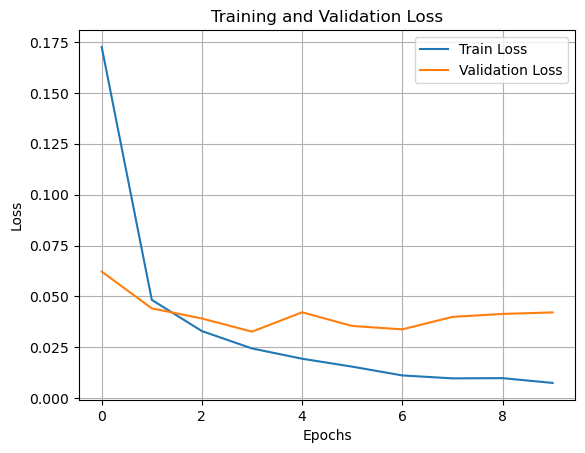

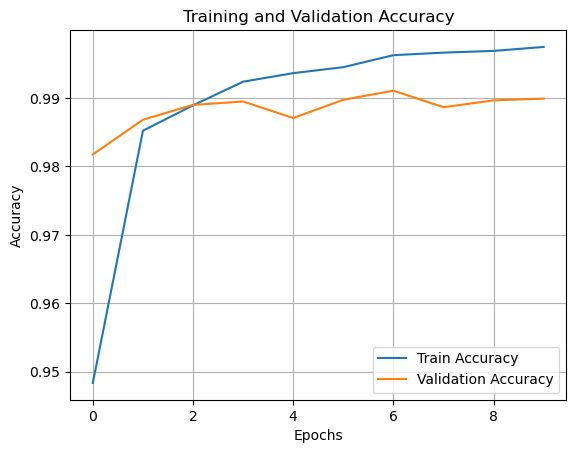

In [9]:
# Plot losses
plt.plot(history.history["loss"], label='Train Loss')  # plot loss
plt.plot(history.history["val_loss"], label='Validation Loss')  # plot val_loss
plt.ylabel('Loss')
plt.xlabel('Epochs')  # x-axis=epochs
plt.grid(True)
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot accuracies
plt.plot(history.history["accuracy"], label='Train Accuracy')  # plot accuracy
plt.plot(history.history["val_accuracy"], label='Validation Accuracy')  # plot val_accuracy
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.grid(True)
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Q2 RNNs

An RNN (Recurrent Neural Network) is a type of artificial neural network that is particularly effective in processing sequential data. Unlike feedforward neural networks, which process inputs independently, RNNs have connections that allow information to flow in cycles. This cyclic connectivity enables them to capture temporal dependencies and learn patterns over time. You can find more in these [neural network lecture notes (Jaeger 2023, chapter 4)](https://www.ai.rug.nl/minds/uploads/LN_NN_RUG.pdf). Here is an overview of how RNNs work:

- **Recurrent Connections**: RNNs have recurrent connections that allow information to be passed from one step to the next in a sequence. At each time step, the RNN takes an input and combines it with the information from the previous step. This feedback loop enables the network to have memory and make predictions based on the context of past inputs.

- **Hidden State**: RNNs maintain a hidden state vector that serves as a memory of the network. The hidden state is updated at each time step and contains information about the previous inputs in the sequence. It captures the network's understanding of the sequence up to that point and is used to influence the processing of future inputs.

- **Sequence Processing**: RNNs process sequences by iterating through each element one at a time. As the network receives an input at each time step, it updates its hidden state based on the input and the previous hidden state. The updated hidden state is then used to make predictions or generate outputs.

- **Long Short-Term Memory (LSTM) and Gated Recurrent Units (GRU)**: LSTMs and GRUs are popular types of RNN architectures that address the vanishing gradient problem and capture long-term dependencies more effectively. These architectures introduce specialized memory cells and gating mechanisms that allow the network to selectively update and forget information.

- **Training**: RNNs are typically trained using the backpropagation through time (BPTT) algorithm, which extends backpropagation to handle sequences. The goal is to minimize the difference between the predicted outputs and the true targets by adjusting the network's parameters through gradient descent optimization.

- **Applications**: RNNs are well-suited for tasks involving sequential data, such as natural language processing, speech recognition, machine translation, time series analysis, and sentiment analysis. They can effectively model dependencies and capture context in these domains.

By leveraging recurrent connections and hidden state information, RNNs excel at processing and understanding sequential data. They are powerful tools for tasks that require temporal modeling and have made significant contributions to the field of deep learning.

Here, we'll use LSTMs to regress on the [Air Passengers](https://www.kaggle.com/datasets/chirag19/air-passengers) dataset, providing monthly totals of a US airline passengers from 1949 to 1960.

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load the Air Passengers dataset
data = pd.read_csv('/Users/tomsagasser/Downloads/AirPassengers - 2024.csv')
time_series = data['#Passengers'].values.astype(float)

# preprocess, use a scaler to scale the features to 0 and 1
time_series = np.array(time_series).reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 1))
time_series = scaler.fit_transform(time_series)

# Split the data into training and testing sets
train_data = time_series[:120]  # First 120 months for training
test_data = time_series[120:]   # Last 24 months for testing

# Function to create input sequences
# Goal: Predict the (n+1)th point given n points
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length and create input sequences
sequence_length = 6
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Reshape the input data to be 3D (batch_size, sequence_length, num_features)
# Standard practice!
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

**Q2.1** Finish the following cell

In [15]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential([
    LSTM(50, input_shape=(sequence_length, 1)),  # LSTM layer with 50 units
    Dense(1)  # Output layer for regression task
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')  # MSE loss and Adam optimizer

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100


/Users/tomsagasser/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0407 - val_loss: 0.1295
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0179 - val_loss: 0.0505
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0100 - val_loss: 0.0233
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0095 - val_loss: 0.0235
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0071 - val_loss: 0.0313
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0066 - val_loss: 0.0385
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0073 - val_loss: 0.0348
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0066 - val_loss: 0.0289
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0070 - val_loss: 0.0263
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0054 - val_loss: 0.0256
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0056 - val_loss: 0.0253
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0059 - val_loss: 0.0254
Epoch

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0043 - val_loss: 0.0173
Epoch 71/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - val_loss: 0.0176
Epoch 72/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - val_loss: 0.0172
Epoch 73/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - val_loss: 0.0173
Epoch 74/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - val_loss: 0.0179
Epoch 75/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038 - val_loss: 0.0173
Epoch 76/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0042 - val_loss: 0.0166
Epoch 77/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0043 - val_loss: 0.0164
Epoch 78/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0041 - val_loss: 0.0171
Epoch 79/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0035 - val_loss: 0.0164
Epoch 80/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0038 - val_loss: 0.0166
Epoch 81/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0029 - val_loss: 0.0167
E

**Q2.2** Plot the train and validation losses and and accuracies. Do not forget to add labels What can you say about the model over/underfitting? Would you continue training it, or stop earlier? Why?

It looks overall like a good fitting model because the training and validation losses decrease to a point of stability with a minimal gap between the two final loss values. This indicates that the model has learned the dataset well and is generalizing well to unseen data.

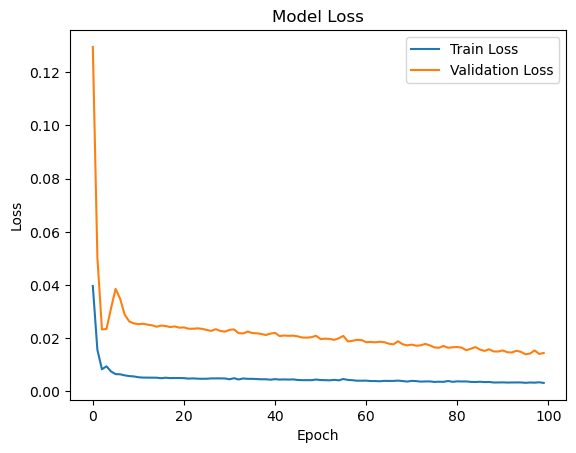

In [16]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

Now, we can make predictions on our test set and evaluate it!

**Q2.3** Finish the following cell

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


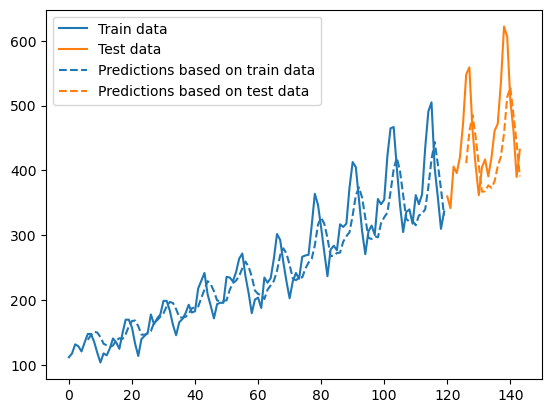

Train Score: 66958.68 (MSE)
Test Score: 186172.72 (MSE)


In [20]:
# Predict on the test set
# make predictions
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# invert predictions to make it original scale
train_preds = scaler.inverse_transform(train_preds)
test_preds = scaler.inverse_transform(test_preds)

# plotting code adapted from https://www.kaggle.com/code/singhalamogh/lstm-regression-on-time-series-data
# shift train predictions for plotting
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[sequence_length:len(train_preds) + sequence_length, :] = train_preds

# shift test true data for plotting
testTruePlot = np.empty_like(data)
testTruePlot[:, :] = np.nan
testTruePlot[len(train_preds)+sequence_length:len(data), :] = scaler.inverse_transform(test_data)

# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_preds)+2*sequence_length:len(data), :] = test_preds

# plot baseline and predictions
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.plot(scaler.inverse_transform(train_data), color=colors[0], label="Train data")
plt.plot(testTruePlot[:,0], color=colors[1], label="Test data")
plt.plot(trainPredictPlot[:,0], color=colors[0], linestyle="--", label="Predictions based on train data")
plt.plot(testPredictPlot[:,0], color=colors[1], linestyle="--", label="Predictions based on test data")
plt.legend()
plt.show()

# calculate root mean squared error
train_score = mean_squared_error(y_train, train_preds)
print('Train Score: %.2f (MSE)' % (train_score))
test_score = mean_squared_error(y_test, test_preds)
print('Test Score: %.2f (MSE)' % (test_score))

**Q2.4** Does the model do well? Write three ideas on how you would make it better. Implement at least one of these ideas and rerun your code, and report your results.

Model seems to capture general trend of data but there are discrepancies between the predictions and the actual data.

You could improve it by addiing more LSTM layers (see code below) or using GRUs instead of LSTMs as they might be better as it is simpler and needs less data to generalize on average.


In [24]:

# Build an updated LSTM model with an additional layer
model2 = keras.Sequential([
    keras.layers.LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    keras.layers.LSTM(50), 
    keras.layers.Dense(1)  
])

# Compile the model with MSE loss function and the Adam optimizer
model2.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model2.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0580 - val_loss: 0.1882
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0261 - val_loss: 0.0654
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0092 - val_loss: 0.0237
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0140 - val_loss: 0.0364
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0081 - val_loss: 0.0529
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0089 - val_loss: 0.0443
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0078 - val_loss: 0.0322
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0081 - val_loss: 0.0285
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0062 - val_loss: 0.0301
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0068 - val_loss: 0.0305
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0061 - val_loss: 0.0284
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0069 - val_los

Epoch 70/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0040 - val_loss: 0.0177
Epoch 71/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0037 - val_loss: 0.0177
Epoch 72/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0043 - val_loss: 0.0192
Epoch 73/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0044 - val_loss: 0.0166
Epoch 74/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0037 - val_loss: 0.0193
Epoch 75/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0041 - val_loss: 0.0173
Epoch 76/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0043 - val_loss: 0.0171
Epoch 77/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0036 - val_loss: 0.0158
Epoch 78/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0040 - val_loss: 0.0180
Epoch 79/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0039 - val_loss: 0.0160
Epoch 80/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0040 - val_loss: 0.0149
Epoch 81/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0043 - v

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


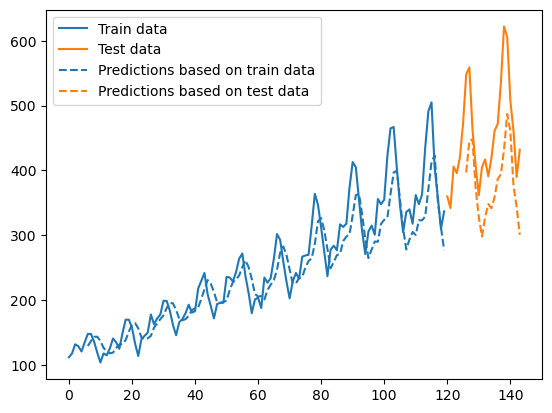

Train Score: 62531.31 (MSE)
Test Score: 147156.98 (MSE)


In [25]:

# Predict on the test set
# make predictions
train_preds = model2.predict(X_train)
test_preds = model2.predict(X_test)

# invert predictions to make it original scale
train_preds = scaler.inverse_transform(train_preds)
test_preds = scaler.inverse_transform(test_preds)

# plotting code adapted from https://www.kaggle.com/code/singhalamogh/lstm-regression-on-time-series-data
# shift train predictions for plotting
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[sequence_length:len(train_preds) + sequence_length, :] = train_preds

# shift test true data for plotting
testTruePlot = np.empty_like(data)
testTruePlot[:, :] = np.nan
testTruePlot[len(train_preds)+sequence_length:len(data), :] = scaler.inverse_transform(test_data)

# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_preds)+2*sequence_length:len(data), :] = test_preds

# plot baseline and predictions
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.plot(scaler.inverse_transform(train_data), color=colors[0], label="Train data")
plt.plot(testTruePlot[:,0], color=colors[1], label="Test data")
plt.plot(trainPredictPlot[:,0], color=colors[0], linestyle="--", label="Predictions based on train data")
plt.plot(testPredictPlot[:,0], color=colors[1], linestyle="--", label="Predictions based on test data")
plt.legend()
plt.show()

# calculate root mean squared error
train_score = mean_squared_error(y_train, train_preds)
print('Train Score: %.2f (MSE)' % (train_score))
test_score = mean_squared_error(y_test, test_preds)
print('Test Score: %.2f (MSE)' % (test_score))

the train and test score (MSE) has gone down. Therefore the model has improved.

# Q3 NLPs

The guest lecturer of week 5 will talk about natural language processing (NLPs). To prepare for this please watch the following videos and per video tell us one thing you learned.

Videos
Intro (5 minutes); https://www.youtube.com/watch?v=CMrHM8a3hqw

Transform & Bert (10 minutes); https://www.youtube.com/watch?v=SZorAJ4I-sA

Optional; Transform (13 minutes) (more in depth); https://www.youtube.com/watch?v=TQQlZhbC5ps

1. (NLP) is a branch of artificial intelligence that enables machines to understand, interpret, and respond to human language in a way that mimics human interaction.
2. transformers form the basis of advanced models like BERT and GPT-3.
3. transformers allow for the parallel processing of sequence data, which is an improvement over the sequential processing used by earlier neural networks like RNNs.